# Empirical model of the Sun

The topic covered in this notebook is the solution of problem 5. from chapter 5 in the book "Introduction to Stellar Astrophysics, vol. 2" by Erika Böhm-Vitense.

## Problem:

The center to limb variation for the solar radiation at $\lambda = 501$ nm has been measured to be approximately:
$$
\frac{I_\lambda(0,\theta)}{I_\lambda(0,0)} = 0.2593 + 0.8724\cos\theta - 0.1336\cos^2\theta.
$$
$I_{501}\lambda(0,0) = 4.05\times 10^{14}\,[\text{cgs} = \text{erg}\,\text{cm}^{-2}\,\text{s}^{-1}]$ where $\Delta \lambda = 1\,\text{cm}$

What is the $S_\lambda(\tau_{501\,\text{nm}})$? 

Assuming that Source function can be approximated with Planck distribution, what is the $T(\tau_{501\,\text{nm}})$?

#### Plot limb darkening
Start by visualizing limb darkening

Text(0, 0.5, '$\\frac{I_\\lambda(0,\\theta)}{I_\\lambda(0,0)}$')

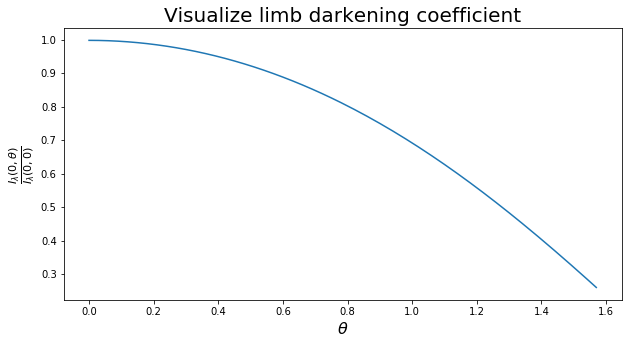

In [102]:
import matplotlib.pyplot as plt
import numpy as np

limb_darkening_function = lambda theta: 0.2593 + 0.8724*np.cos(theta) - 0.1336*np.cos(theta)**2
theta = np.arange(0, np.pi/2, 0.01)

# Plot
plt.figure(figsize=(10,5))
plt.plot(theta, limb_darkening_function(theta))
plt.title("Visualize limb darkening coefficient", fontsize=20)
plt.xlabel(r"$\theta$", fontsize=16)
plt.ylabel(r"$\frac{I_\lambda(0,\theta)}{I_\lambda(0,0)}$", fontsize=16)

Picture of the Sun in the visual continuum. Limb darkening can be easly seen.

<img src="images/limb_darkening_Sun.jpg" width="600">

## Solution

If we expand source function with respect to optical depth:
$$
S_\lambda(\tau_\lambda) = \sum_{i=0}^{\infty} a_{\lambda i} \tau_\lambda^i
$$
We obtain:
$$
I_\lambda(0,\theta) =\sum_{i=0}^\infty A_{\lambda i} \cos^i\theta = \sum_{i=0}^\infty a_{\lambda i} i! \cos^i\theta
$$
(Try to prove it using formal solution of radiative transfer equation, and [gamma function](https://en.wikipedia.org/wiki/Gamma_function) definition.) Knowing that we can easly compute $A_{\lambda i}$ coefficients:

In [26]:
I_0_0= 4.05e14

A0= 0.2593 * I_0_0
A1= 0.8724 * I_0_0
A2= -0.1336 * I_0_0

a0= A0/1
a1= A1/1
a2= A2/(1*2)

S = lambda tau: a0 + a1*tau + a2*tau**2 # [cgs = erg s^-1 sr^-1 cm^-3]

Lets plot S as the function of tau:

Text(0.5, 1.0, 'Source function as a function of optical depth')

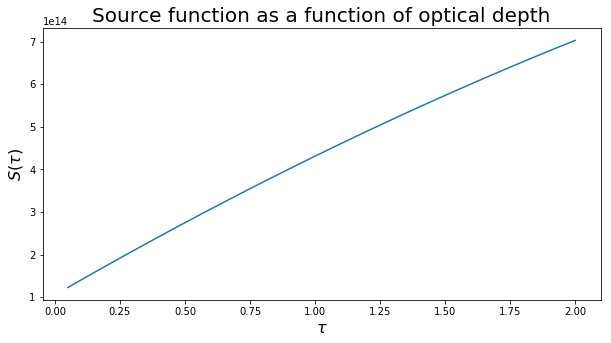

In [100]:
taus = np.arange(0.05, 2, 0.001)
Ss = S(taus)

# Plot results
plt.figure(figsize=(10,5))
plt.plot(taus, Ss)

plt.xlabel(r"$\tau$", fontsize=16)
plt.ylabel(r"$S(\tau)$", fontsize=16)
plt.title("Source function as a function of optical depth", fontsize=20)

Now assuming that the source function equals Planck function:
$$
S_\lambda(\tau_\lambda) = B_\lambda(T(\tau_\lambda)) = \frac{2 h c^2}{\lambda^5} \frac{1}{\exp\big(\frac{hc}{\lambda k T}\big) - 1}
$$
We see that it can be easly solved for temperature:

$$
T(\tau_\lambda) = \frac{h c}{\lambda k}\ln^{-1} \Bigg(\frac{2 h c^2}{\lambda^5 S_\lambda (\tau_\lambda)} + 1 \Bigg)
$$

In [86]:
import scipy.constants as const

def T_lam(tau, lam, source_function):
    # lam [nm]
    lam *= 1e-9 # [m]
    S_tau = source_function(tau) * 0.1 # cgs -> SI
    return const.h*const.c/(lam * const.k * np.log(2*const.h*const.c**2/(lam**5*S_tau) + 1))

T = T_lam(taus, 501, S)

Text(0.5, 1.0, 'Source function as a function of optical depth')

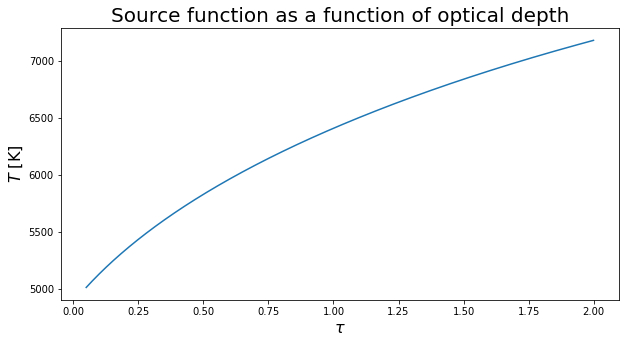

In [101]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(taus, T)

plt.xlabel(r"$\tau$", fontsize=16)
plt.ylabel(r"$T$ [K]", fontsize=16)
plt.title("Source function as a function of optical depth", fontsize=20)

### Comment

That is pretty powerfull idea: measuring just the monochromatic limb darkening we are able to estimate the temperature profile as a function of optical depth. Unfortunatelly, up to now, limb darkening can be accurately measured only in case of the Sun, so for other stars we need to rely on more complicated models.

Lets think for a while: what more can be found about solar atmosphere if we would measure limb darkening at different wavelengths? That is the great topic for another notebook! (You can also check the chapter 6. of book mentioned in the begining.)